In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# data loading
train_data= pd.read_csv('/content/ridgetrain.txt', delim_whitespace=True, header=None)
test_data= pd.read_csv('/content/ridgetest.txt', delim_whitespace=True, header=None)
x_train= np.array(train_data[0])
y_train= np.array(train_data[1])
x_test= np.array(test_data[0])
y_test= np.array(test_data[1])

In [3]:
def kernel(x , y):
  return np.exp(-0.1*np.square(x.reshape(-1,1)- y.reshape(1,-1)))

In [4]:
L= [2,5,20,50,100]

RMSE for lambda = 0.1 and L = 2 is 0.9612247690170365
RMSE for lambda = 0.1 and L = 5 is 0.8472911425326899
RMSE for lambda = 0.1 and L = 20 is 0.3484986322218994
RMSE for lambda = 0.1 and L = 50 is 0.09685100841936817
RMSE for lambda = 0.1 and L = 100 is 0.05856496574717322


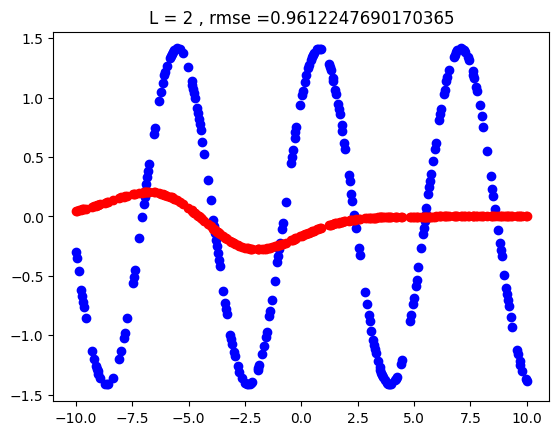

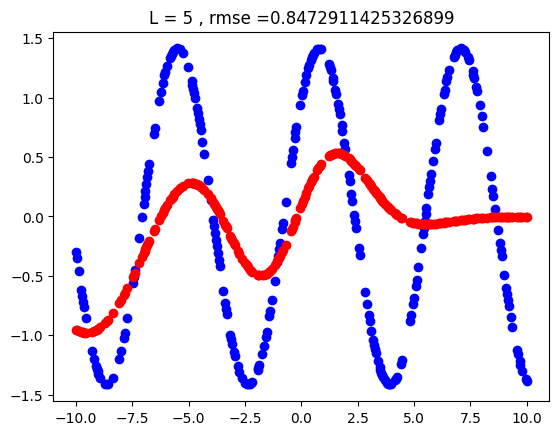

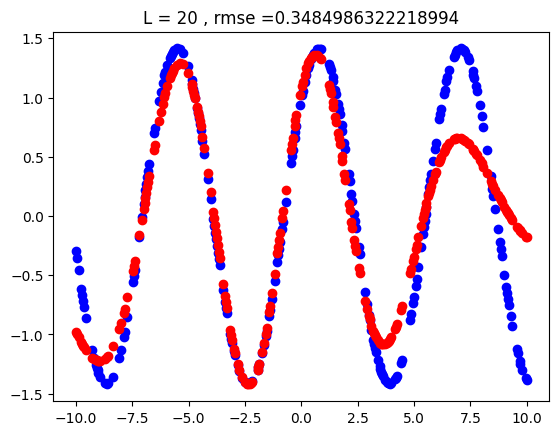

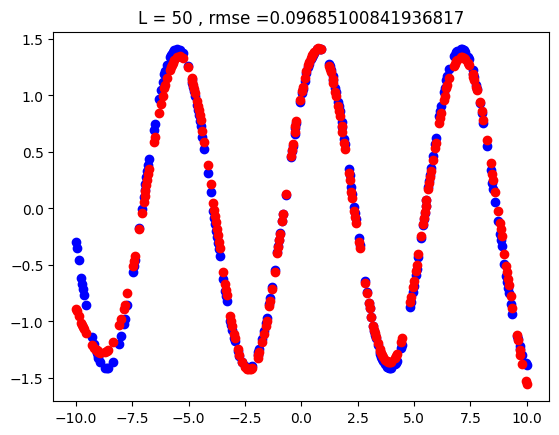

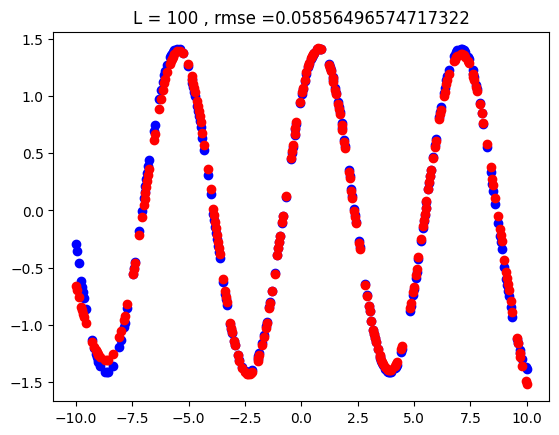

In [8]:
for l in L:
  landmarks = np.random.choice(x_train, l, replace=False)
  k_train= kernel(x_train,landmarks)
  w = np.dot(np.linalg.inv(np.dot(k_train.T,k_train) + 0.1*np.identity(l)), np.dot(k_train.T,y_train.reshape(-1,1)))

  k_test= kernel(x_test,landmarks)
  y_pred = np.dot(k_test, w).reshape(-1,1)

  rmse= np.sqrt(mean_squared_error(y_test.reshape(-1,1),y_pred))
  print('RMSE for lambda = 0.1 and L = '+ str(l) + ' is ' + str(rmse) )

  plt.figure()
  plt.plot(x_test,y_test, 'bo')
  plt.plot(x_test,y_pred, 'ro')
  plt.title('L = '+str(l) + ' , rmse ='+ str(rmse))
plt.show()